51200882 - Mai Nhật Duy
52100628 - Trương Thành Huy
52100885 - Mai Xuân Hà

In [1]:
#51200882 - Mai Nhật Duy
#52100628 - Trương Thành Huy
#52100885 - Mai Xuân Hà

# Import thư viện và đọc dữ liệu

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import VotingClassifier, RandomForestClassifier

In [3]:
data= pd.read_csv("data/weatherAUS.csv" , sep = ",")
df=data.copy().drop_duplicates()
df.tail(5)

,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,...,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow
145455,2017-06-21,Uluru,2.8,23.4,0.0,NaN,NaN,E,31.0,SE,...,51.0,24.0,1024.6,1020.3,NaN,NaN,10.1,22.4,No,No
145456,2017-06-22,Uluru,3.6,25.3,0.0,NaN,NaN,NNW,22.0,SE,...,56.0,21.0,1023.5,1019.1,NaN,NaN,10.9,24.5,No,No
145457,2017-06-23,Uluru,5.4,26.9,0.0,NaN,NaN,N,37.0,SE,...,53.0,24.0,1021.0,1016.8,NaN,NaN,12.5,26.1,No,No
145458,2017-06-24,Uluru,7.8,27.0,0.0,NaN,NaN,SE,28.0,SSE,...,51.0,24.0,1019.4,1016.5,3.0,2.0,15.1,26.0,No,No
145459,2017-06-25,Uluru,14.9,NaN,0.0,NaN,NaN,NaN,NaN,ESE,...,62.0,36.0,1020.2,1017.9,8.0,8.0,15.0,20.9,No,NaN


# Data Analyst

In [4]:
df_for_analyst = df.copy()

Text(0.5, 1.0, 'type of our data ')

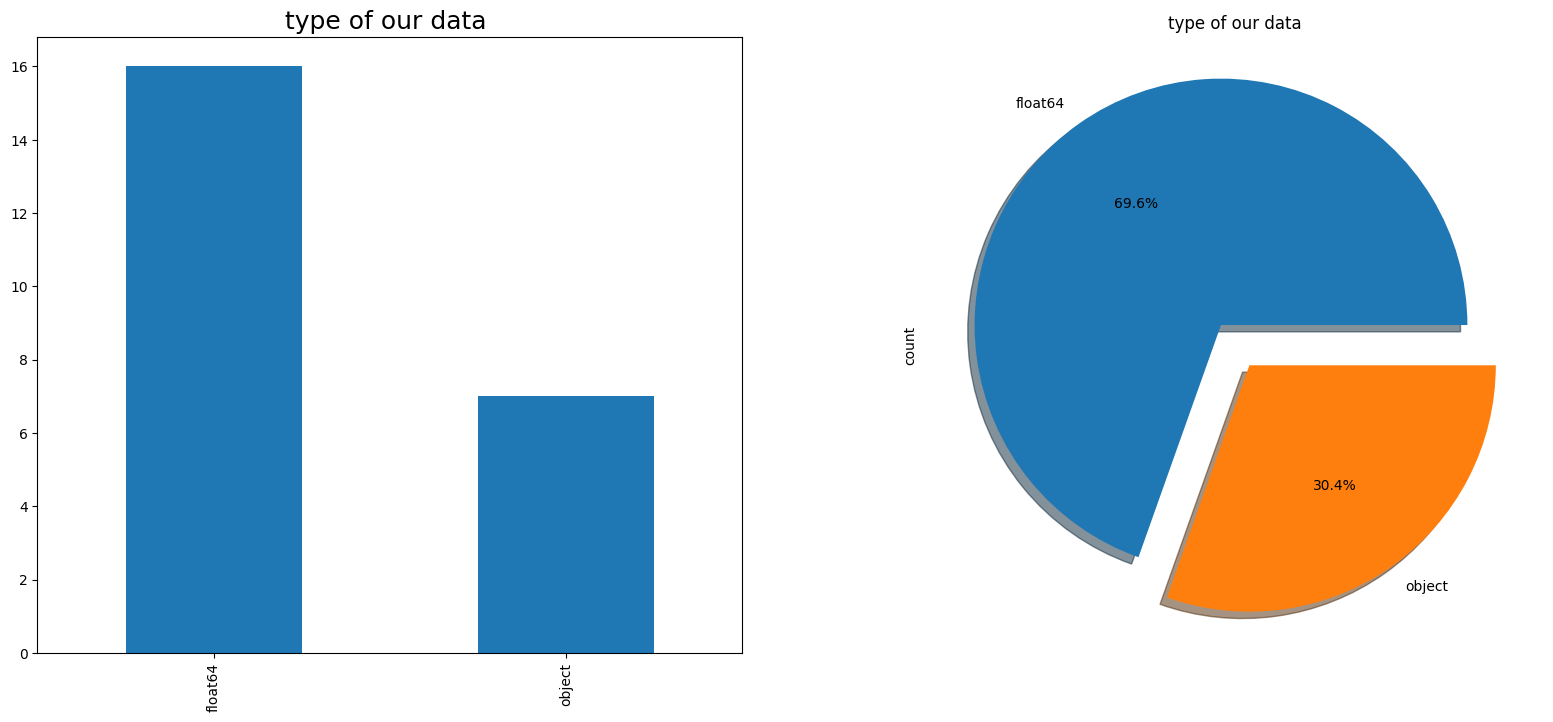

In [5]:
fig, axarr = plt.subplots(1, 2, figsize=(20, 8))
df_for_analyst.dtypes.value_counts().plot.pie(explode=[0.1,0.1],autopct='%1.1f%%',shadow=True,ax=axarr[1])
axarr[1].set_title("type of our data ", fontsize=18)
df_for_analyst.dtypes.value_counts().plot(kind='bar',ax=axarr[0])
plt.title('type of our data')
axarr[0].set_title("type of our data ", fontsize=18)

In [6]:
df_for_analyst.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 145460 entries, 0 to 145459
Data columns (total 23 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   Date           145460 non-null  object 
 1   Location       145460 non-null  object 
 2   MinTemp        143975 non-null  float64
 3   MaxTemp        144199 non-null  float64
 4   Rainfall       142199 non-null  float64
 5   Evaporation    82670 non-null   float64
 6   Sunshine       75625 non-null   float64
 7   WindGustDir    135134 non-null  object 
 8   WindGustSpeed  135197 non-null  float64
 9   WindDir9am     134894 non-null  object 
 10  WindDir3pm     141232 non-null  object 
 11  WindSpeed9am   143693 non-null  float64
 12  WindSpeed3pm   142398 non-null  float64
 13  Humidity9am    142806 non-null  float64
 14  Humidity3pm    140953 non-null  float64
 15  Pressure9am    130395 non-null  float64
 16  Pressure3pm    130432 non-null  float64
 17  Cloud9am       89572 non-null

In [7]:
df_for_analyst = df_for_analyst.dropna(subset=['RainToday'])
df_for_analyst = df_for_analyst.dropna(subset=['RainTomorrow'])

In [8]:
df['Date'] = pd.to_datetime(df['Date'])
# Tạo cột "Month" để lưu thông tin về tháng
df['Month'] = df['Date'].dt.month
df['Day'] = df['Date'].dt.day
df['Year'] = df['Date'].dt.year

In [9]:
df_for_analyst['Date'] = pd.to_datetime(df_for_analyst['Date'])
# Tạo cột "Month" để lưu thông tin về tháng
df_for_analyst['Month'] = df_for_analyst['Date'].dt.month
df_for_analyst['Day'] = df_for_analyst['Date'].dt.day
df_for_analyst['Year'] = df_for_analyst['Date'].dt.year

Những dữ liệu phân loại nào có % gắn với dự báo ngày mai mưa thì đó là một điểm để dự báo.

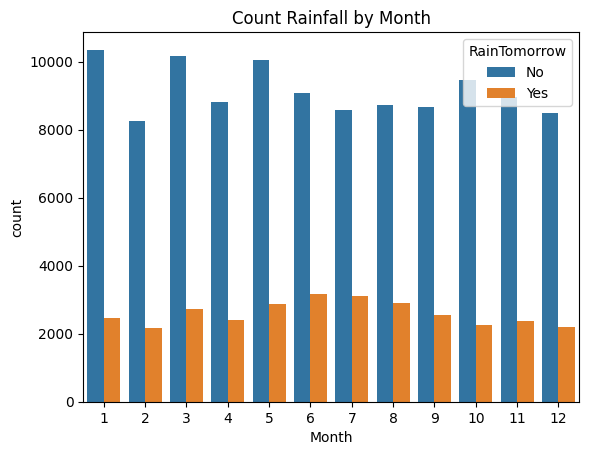

In [10]:
# print(df['Month'].value_counts())
sns.countplot(x='Month', hue='RainTomorrow', data=df_for_analyst)
plt.title('Count Rainfall by Month')
plt.show()

       RainToday  RainTomorrow
Month                         
1      18.887239     19.145112
2      20.660839     20.804918
3      21.637563     21.047730
4      21.614630     21.445138
5      22.086459     22.264326
6      26.301191     25.950400
7      26.989708     26.569468
8      25.248970     25.025755
9      22.749955     22.669756
10     19.598634     19.291204
11     21.088795     21.027132
12     21.171634     20.611044


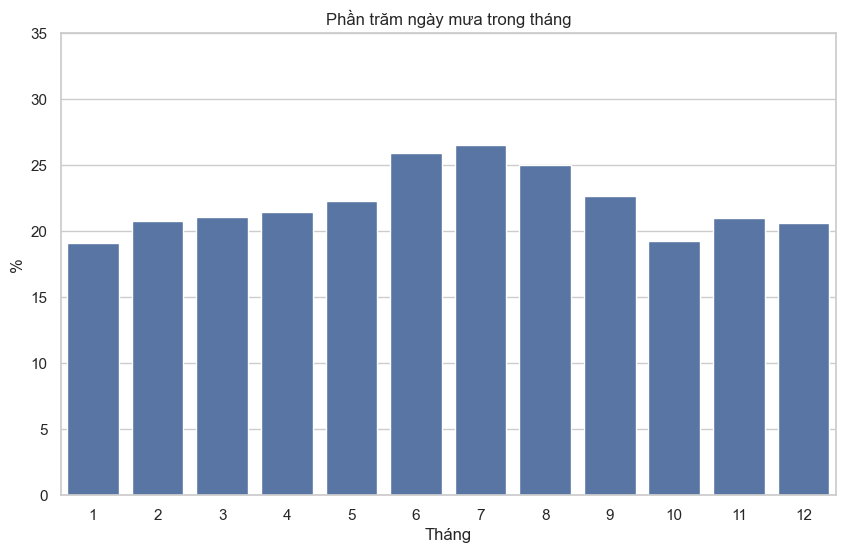

In [11]:
rain_percent = df_for_analyst.groupby('Month')[['RainToday', 'RainTomorrow']].apply(lambda x: ((x == 'Yes').sum() / len(x)) * 100)
print(rain_percent)
# Vẽ biểu đồ phần trăm khả năng mưa theo tháng bằng Seaborn
sns.set(style="whitegrid")
plt.figure(figsize=(10, 6))
sns.barplot(x=rain_percent.index, y=rain_percent['RainTomorrow'])
plt.title("Phần trăm ngày mưa trong tháng")
plt.xlabel("Tháng")
plt.ylabel("%")
plt.ylim(0, 35)
plt.show()

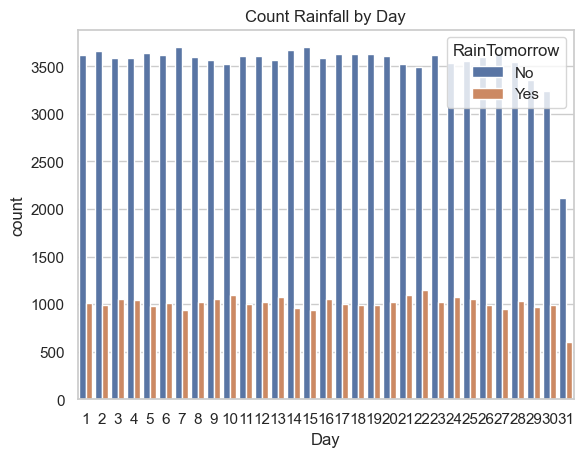

In [12]:
sns.countplot(x='Day', hue='RainTomorrow', data=df_for_analyst)
plt.title('Count Rainfall by Day')
plt.show()

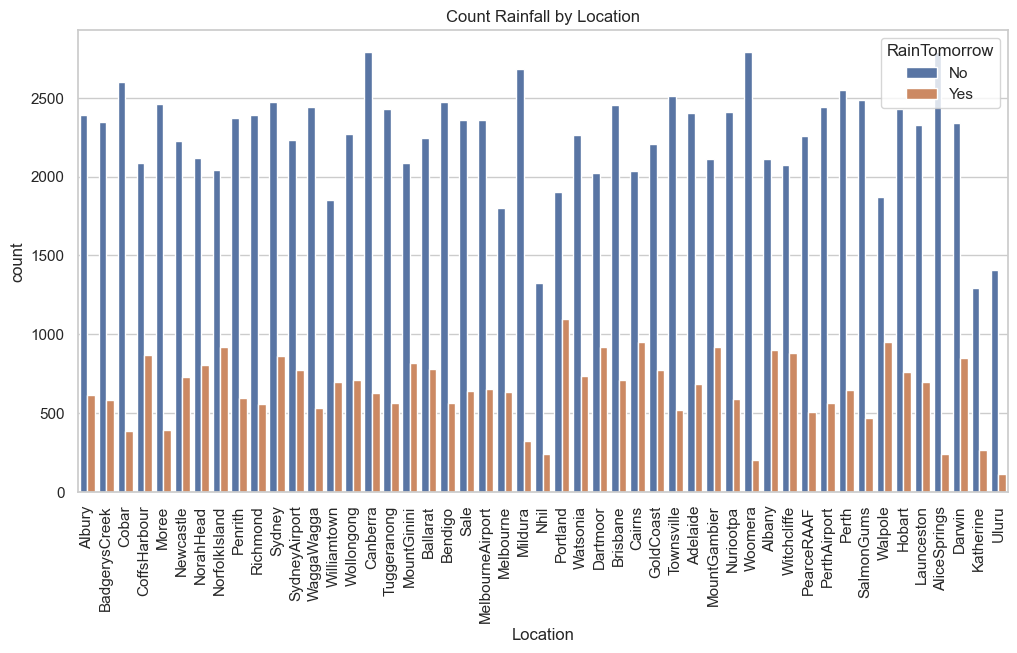

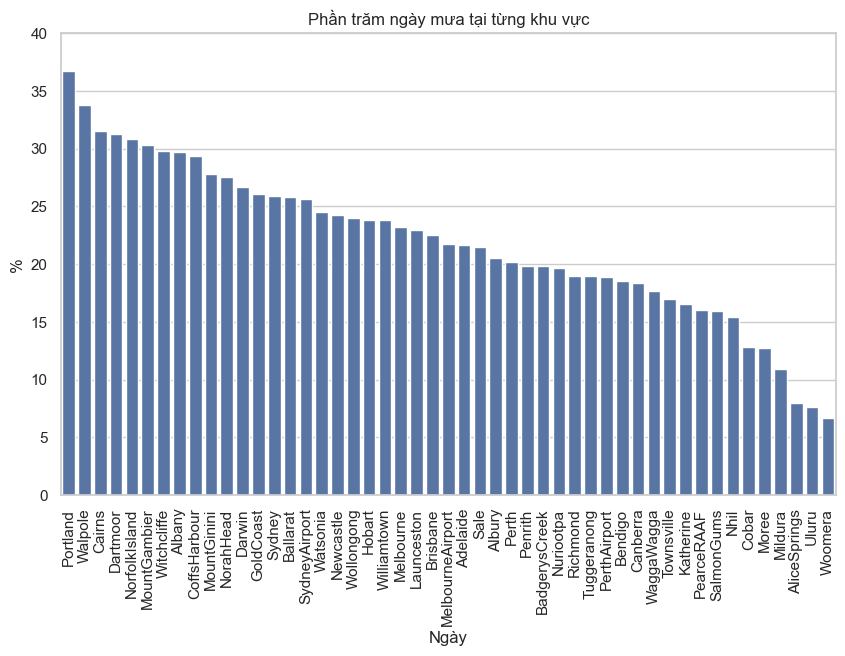

In [13]:
rain_counts = df['RainTomorrow'].value_counts().sort_values(ascending=False)
plt.figure(figsize=(12, 6))
sns.countplot(x='Location', hue='RainTomorrow', data=df)
plt.xticks(rotation=90)
plt.title('Count Rainfall by Location')


rain_percent = df_for_analyst.groupby('Location')[['RainToday', 'RainTomorrow']].apply(lambda x: ((x == 'Yes').sum() / len(x)) * 100)
rain_percent_sorted = rain_percent.sort_values(by='RainTomorrow', ascending=False)

# Vẽ biểu đồ phần trăm khả năng mưa theo tháng bằng Seaborn
sns.set(style="whitegrid")
plt.figure(figsize=(10, 6))
sns.barplot(x=rain_percent_sorted.index, y=rain_percent_sorted['RainTomorrow'])
plt.title("Phần trăm ngày mưa tại từng khu vực")
plt.xlabel("Ngày")
plt.xticks(rotation=90)
plt.ylabel("%")
plt.ylim(0, 40)
plt.show()
# print(rain_percent)

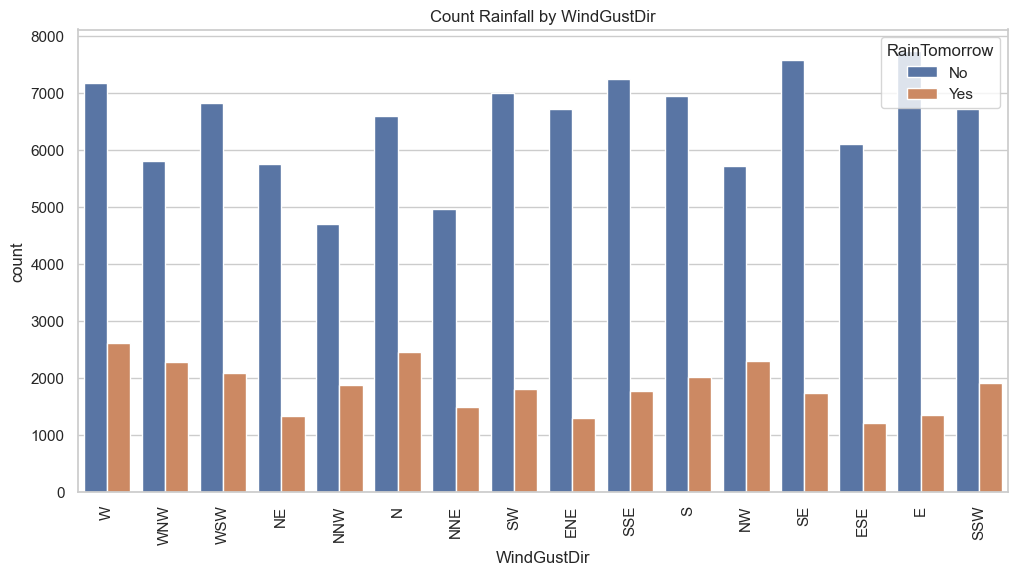

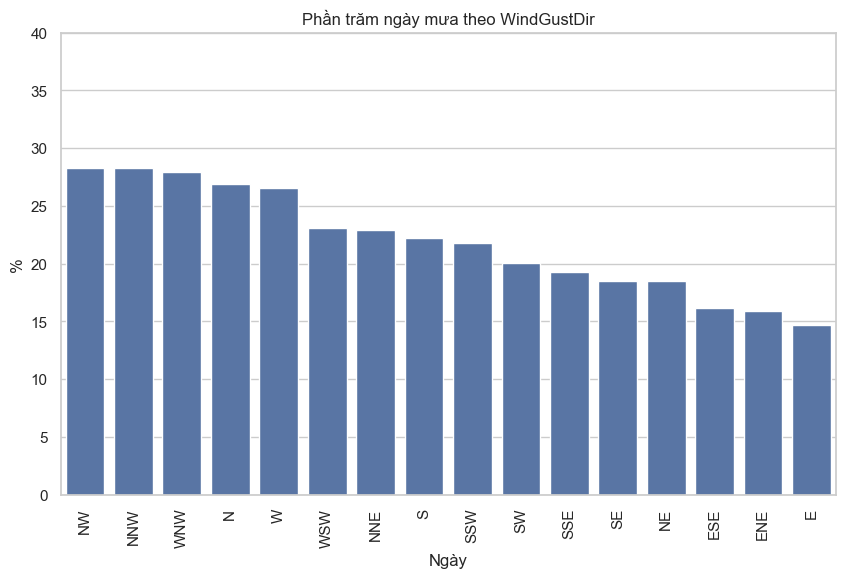

In [14]:
[ 'WindDir9am',
       'WindDir3pm', 'RainToday']
rain_counts = df['RainTomorrow'].value_counts().sort_values(ascending=False)
plt.figure(figsize=(12, 6))
sns.countplot(x='WindGustDir', hue='RainTomorrow', data=df)
plt.xticks(rotation=90)
plt.title('Count Rainfall by WindGustDir')

rain_percent = df_for_analyst.groupby('WindGustDir')[['RainToday', 'RainTomorrow']].apply(lambda x: ((x == 'Yes').sum() / len(x)) * 100)
rain_percent_sorted = rain_percent.sort_values(by='RainTomorrow', ascending=False)

# Vẽ biểu đồ phần trăm khả năng mưa theo tháng bằng Seaborn
sns.set(style="whitegrid")
plt.figure(figsize=(10, 6))
sns.barplot(x=rain_percent_sorted.index, y=rain_percent_sorted['RainTomorrow'])
plt.title("Phần trăm ngày mưa theo WindGustDir")
plt.xlabel("Ngày")
plt.xticks(rotation=90)
plt.ylabel("%")
plt.ylim(0, 40)
plt.show()
# print(rain_percent)

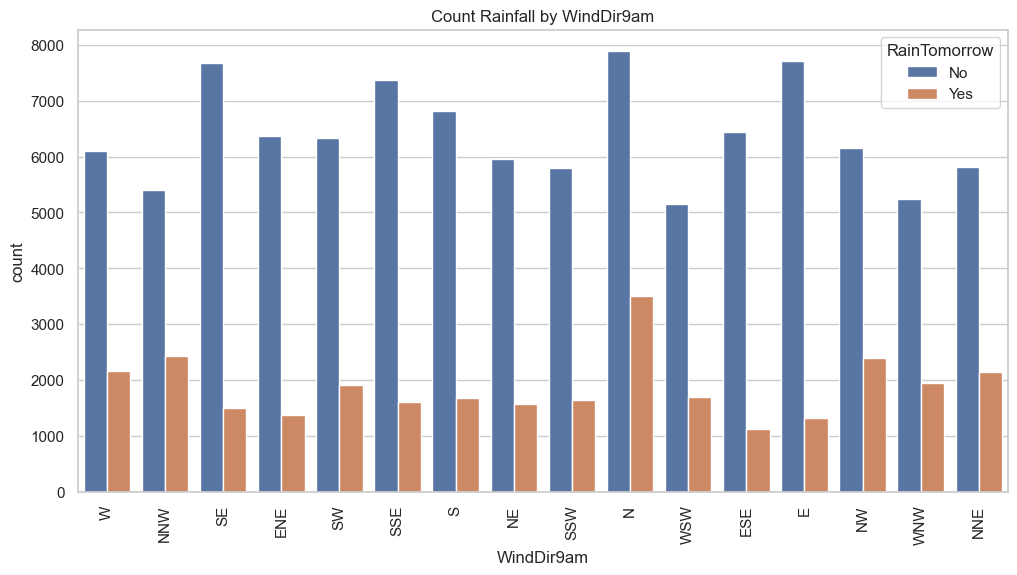

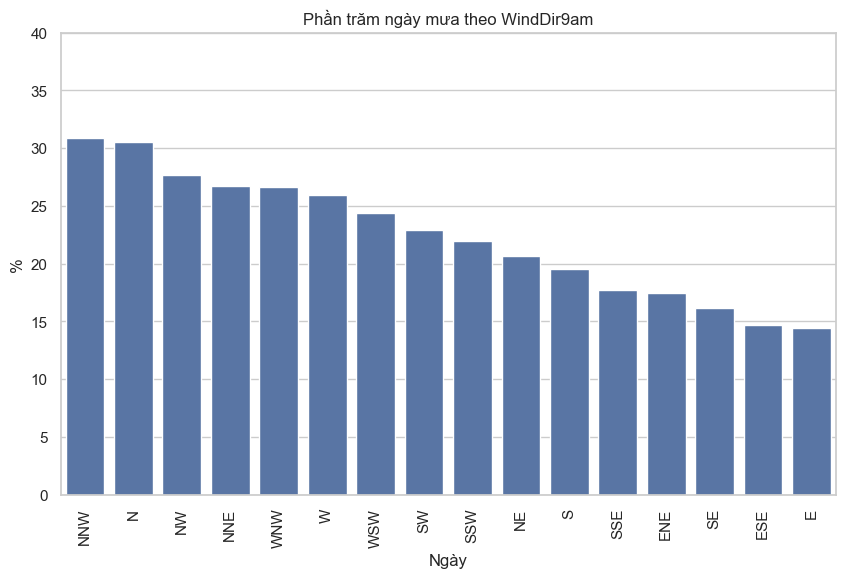

In [15]:

rain_counts = df['RainTomorrow'].value_counts().sort_values(ascending=False)
plt.figure(figsize=(12, 6))
sns.countplot(x='WindDir9am', hue='RainTomorrow', data=df)
plt.xticks(rotation=90)
plt.title('Count Rainfall by WindDir9am')

rain_percent = df_for_analyst.groupby('WindDir9am')[['RainToday', 'RainTomorrow']].apply(lambda x: ((x == 'Yes').sum() / len(x)) * 100)
rain_percent_sorted = rain_percent.sort_values(by='RainTomorrow', ascending=False)

# Vẽ biểu đồ phần trăm khả năng mưa theo tháng bằng Seaborn
sns.set(style="whitegrid")
plt.figure(figsize=(10, 6))
sns.barplot(x=rain_percent_sorted.index, y=rain_percent_sorted['RainTomorrow'])
plt.title("Phần trăm ngày mưa theo WindDir9am")
plt.xlabel("Ngày")
plt.xticks(rotation=90)
plt.ylabel("%")
plt.ylim(0, 40)
plt.show()
# print(rain_percent)

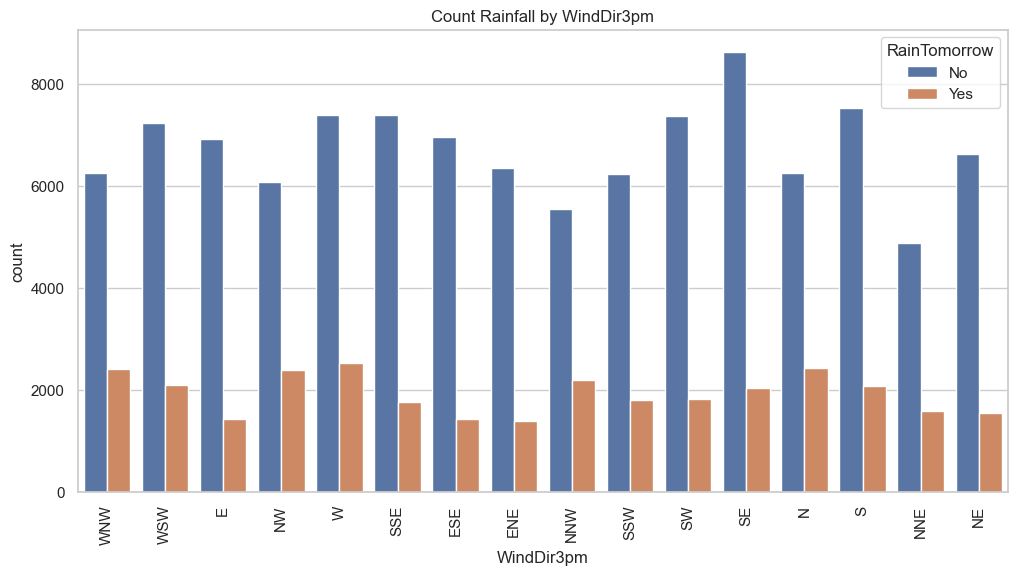

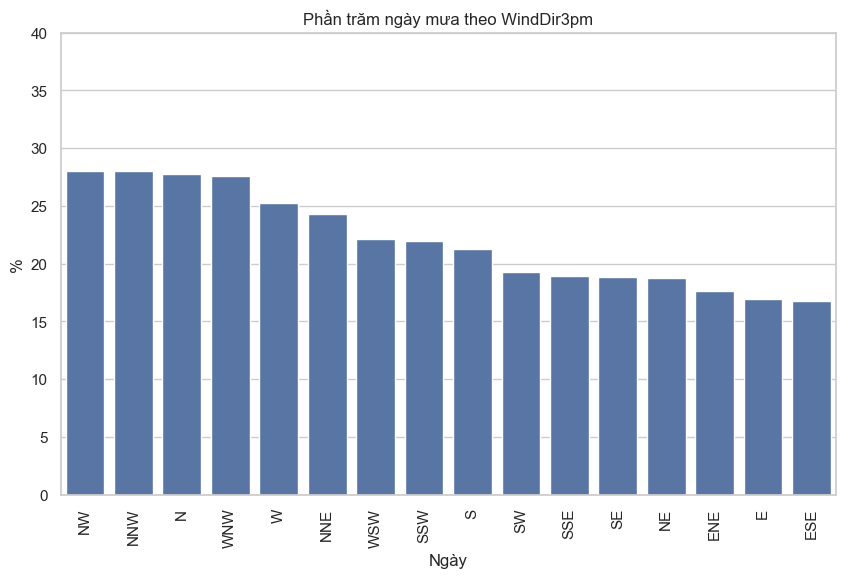

In [16]:

rain_counts = df['RainTomorrow'].value_counts().sort_values(ascending=False)
plt.figure(figsize=(12, 6))
sns.countplot(x='WindDir3pm', hue='RainTomorrow', data=df)
plt.xticks(rotation=90)
plt.title('Count Rainfall by WindDir3pm')

rain_percent = df_for_analyst.groupby('WindDir3pm')[['RainToday', 'RainTomorrow']].apply(lambda x: ((x == 'Yes').sum() / len(x)) * 100)
rain_percent_sorted = rain_percent.sort_values(by='RainTomorrow', ascending=False)

# Vẽ biểu đồ phần trăm khả năng mưa theo tháng bằng Seaborn
sns.set(style="whitegrid")
plt.figure(figsize=(10, 6))
sns.barplot(x=rain_percent_sorted.index, y=rain_percent_sorted['RainTomorrow'])
plt.title("Phần trăm ngày mưa theo WindDir3pm")
plt.xlabel("Ngày")
plt.xticks(rotation=90)
plt.ylabel("%")
plt.ylim(0, 40)
plt.show()
# print(rain_percent)

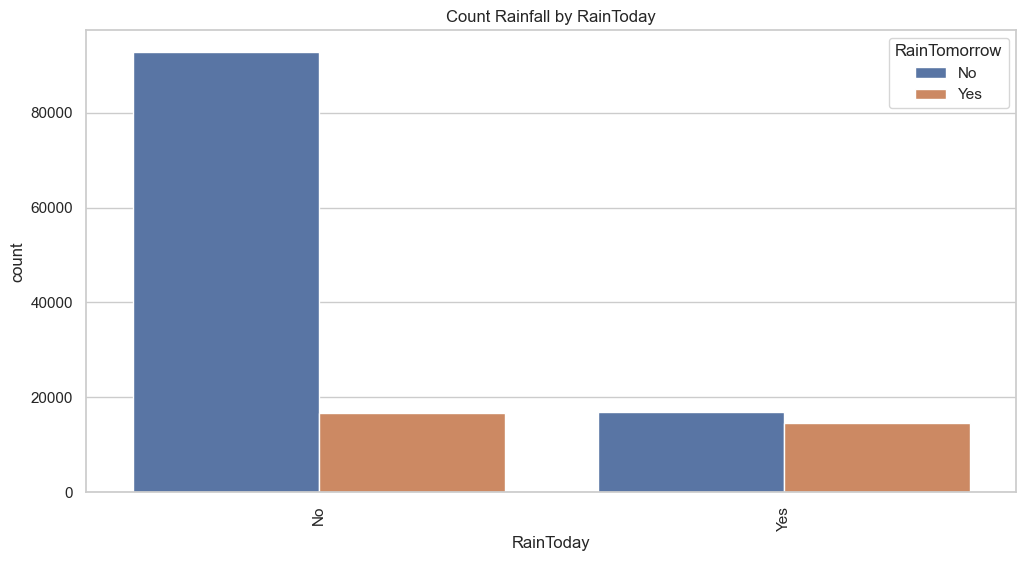

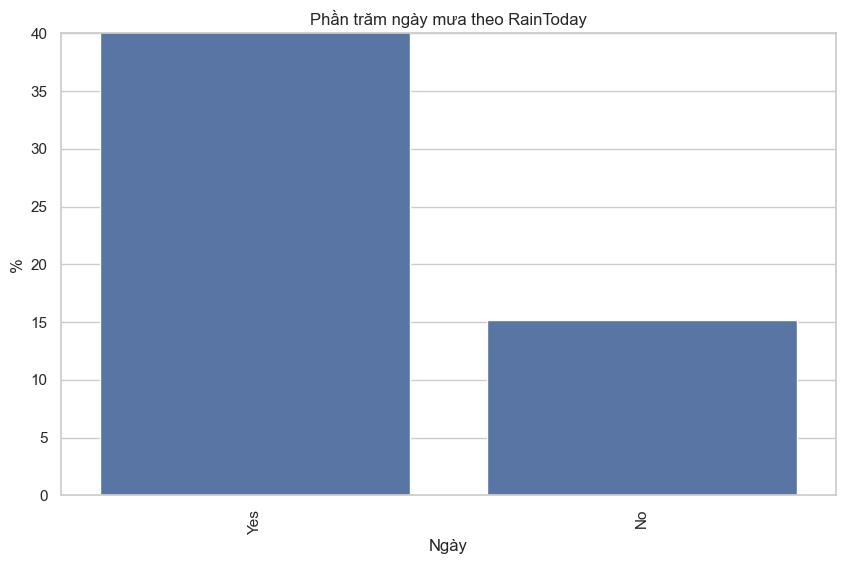

In [17]:

rain_counts = df['RainTomorrow'].value_counts().sort_values(ascending=False)
plt.figure(figsize=(12, 6))
sns.countplot(x='RainToday', hue='RainTomorrow', data=df)
plt.xticks(rotation=90)
plt.title('Count Rainfall by RainToday')

rain_percent = df_for_analyst.groupby('RainToday')[['RainToday', 'RainTomorrow']].apply(lambda x: ((x == 'Yes').sum() / len(x)) * 100)
rain_percent_sorted = rain_percent.sort_values(by='RainTomorrow', ascending=False)

# Vẽ biểu đồ phần trăm khả năng mưa theo tháng bằng Seaborn
sns.set(style="whitegrid")
plt.figure(figsize=(10, 6))
sns.barplot(x=rain_percent_sorted.index, y=rain_percent_sorted['RainTomorrow'])
plt.title("Phần trăm ngày mưa theo RainToday")
plt.xlabel("Ngày")
plt.xticks(rotation=90)
plt.ylabel("%")
plt.ylim(0, 40)
plt.show()
# print(rain_percent)

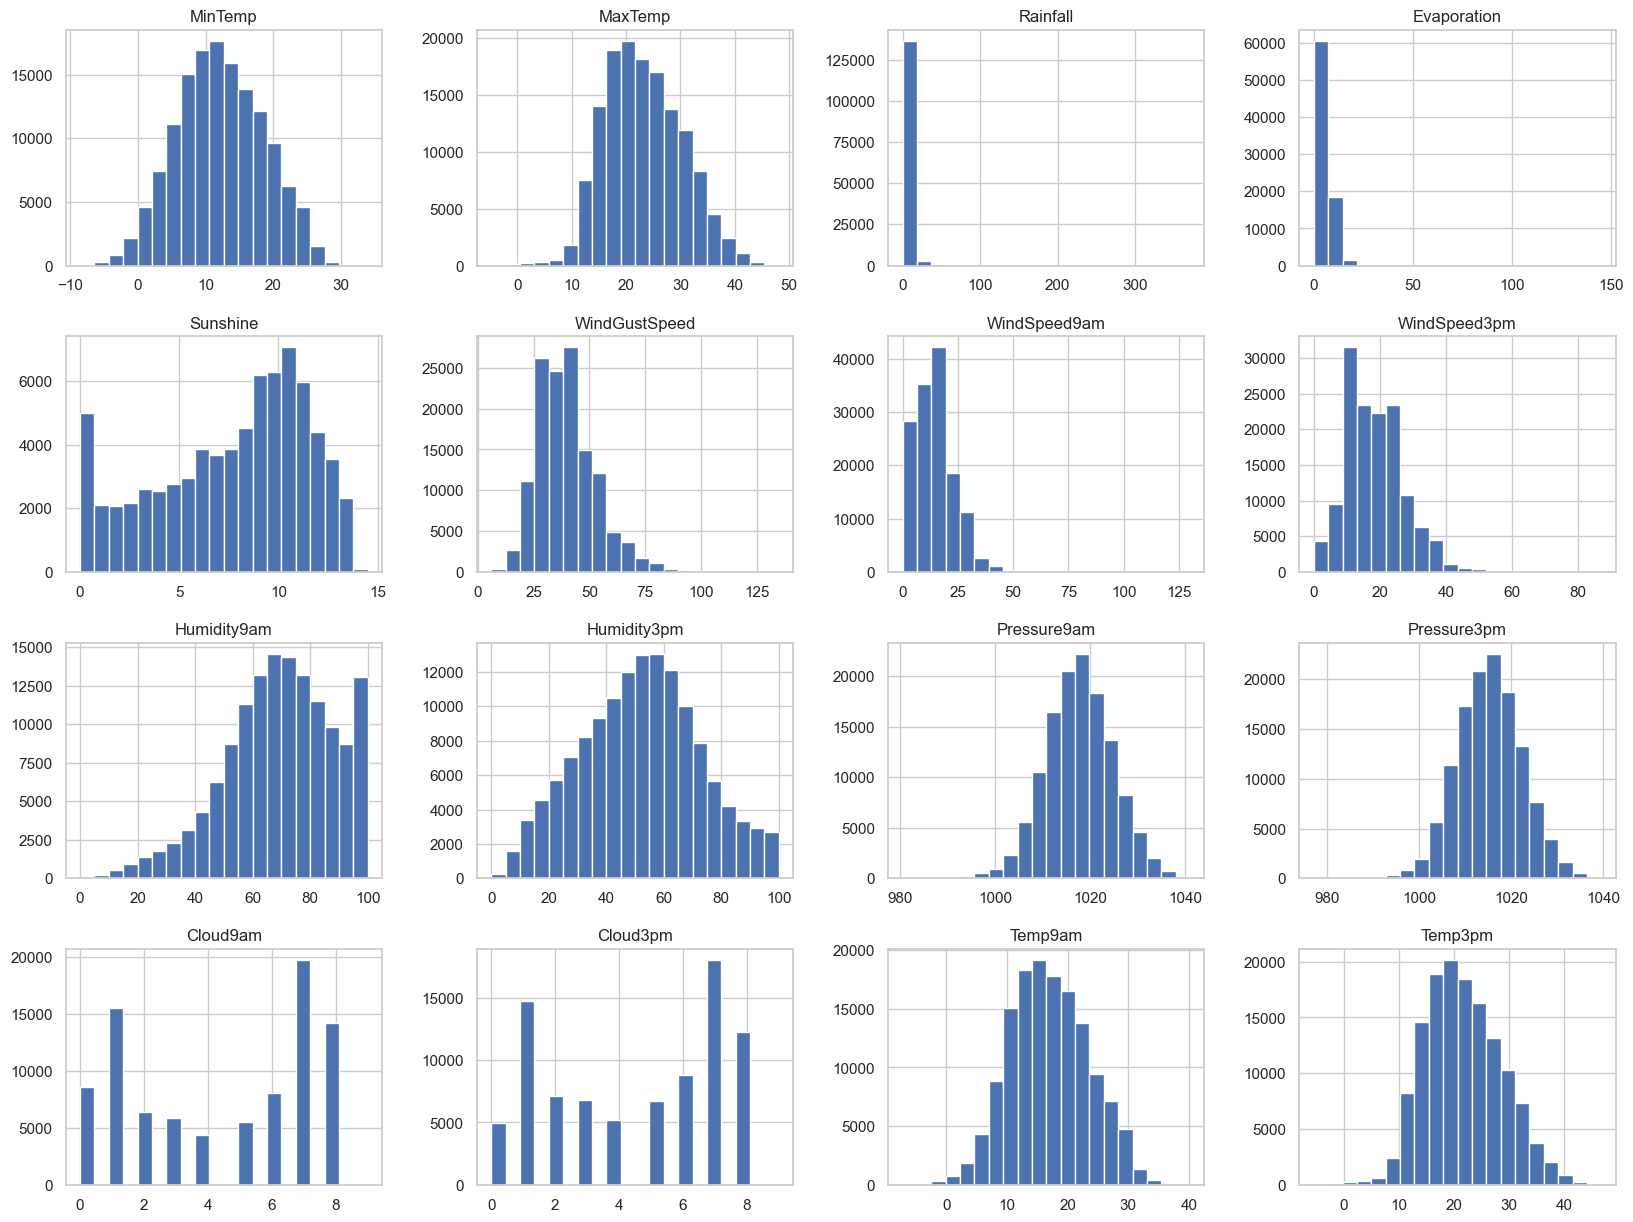

In [18]:
features = ['MinTemp','MaxTemp','Rainfall','Evaporation','Sunshine','WindGustDir','WindGustSpeed','WindDir9am','WindDir3pm','WindSpeed9am','WindSpeed3pm','Humidity9am','Humidity3pm','Pressure9am','Pressure3pm','Cloud9am','Cloud3pm','Temp9am','Temp3pm'
]
df_for_analyst[features].hist(figsize=(20, 15), bins=20)
plt.show()

Nhình vào bảng thống kê ta sẽ thấy nếu feature nào cho thấy sự chênh lệch rõ giữa giá trị mưa và không mưa thì feature đó là một feature quan trọng vì nó là điều kiện quan trọng để dự báo thời tiết ngày mai.

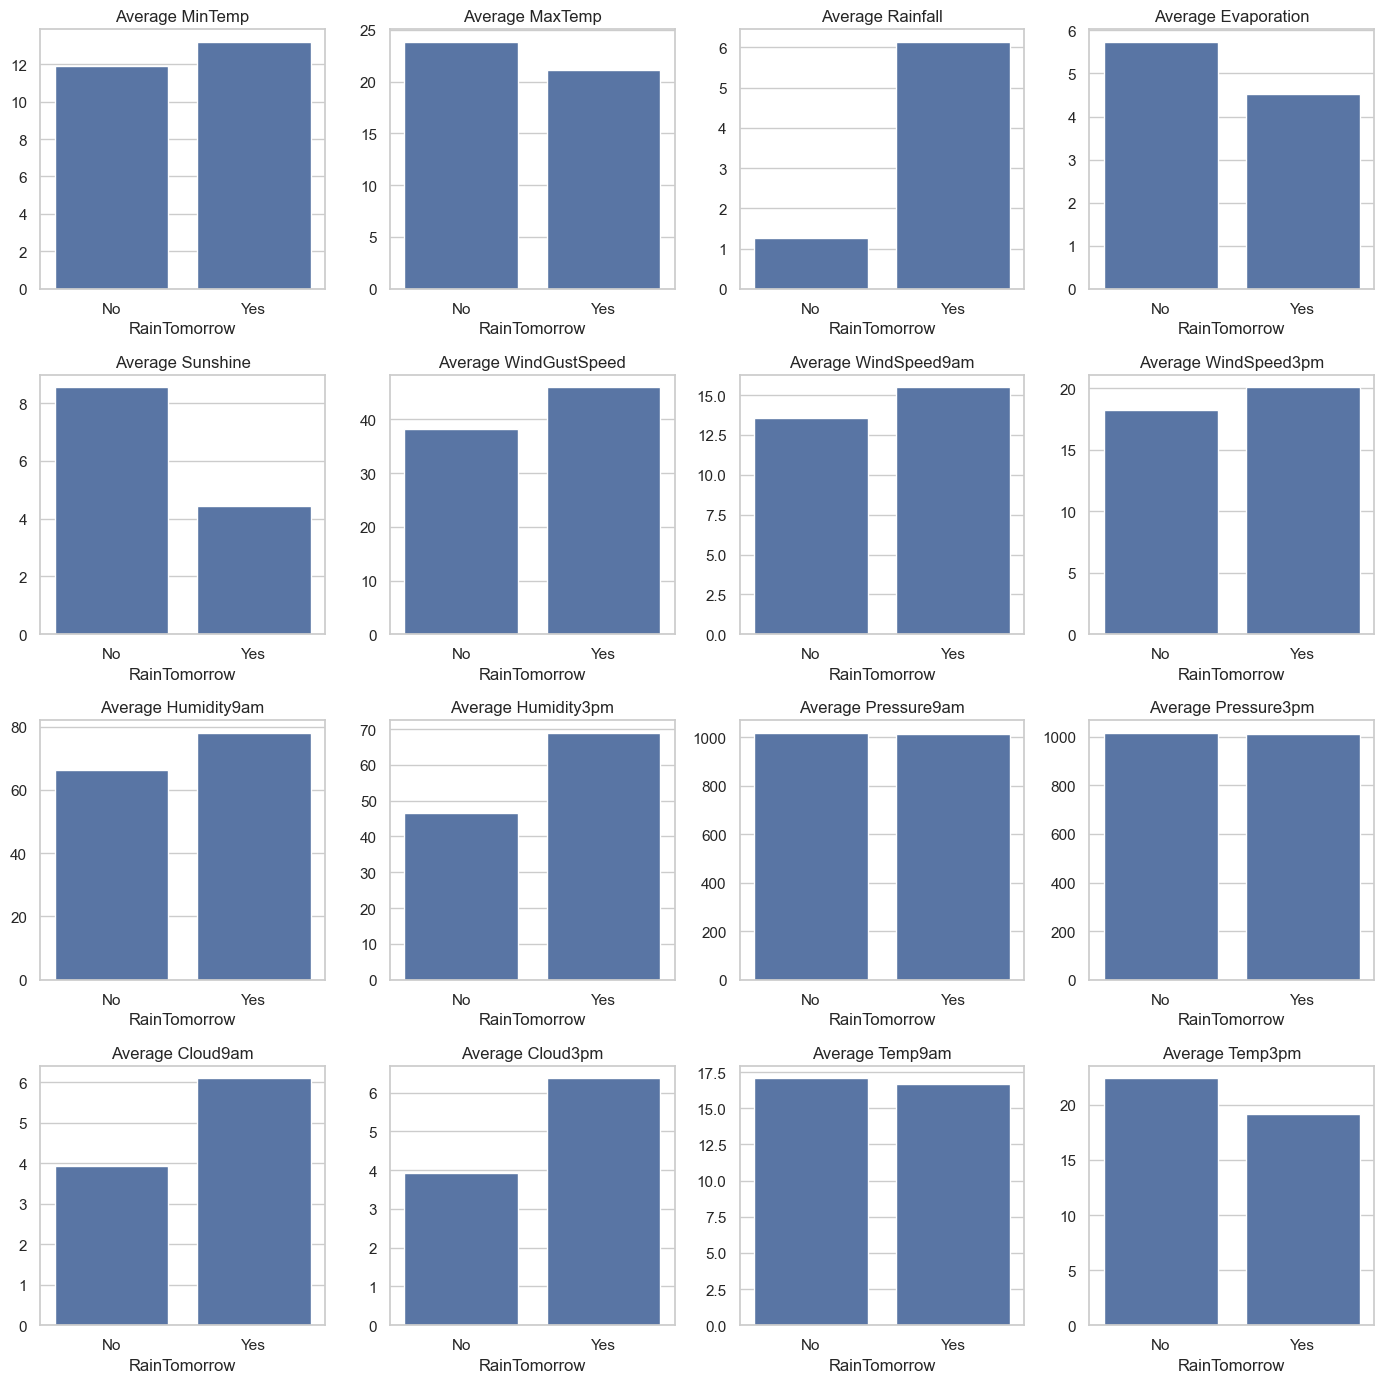

In [19]:
fill = ['MinTemp','MaxTemp','Rainfall','Evaporation','Sunshine','WindGustSpeed','WindSpeed9am','WindSpeed3pm','Humidity9am','Humidity3pm','Pressure9am','Pressure3pm','Cloud9am','Cloud3pm','Temp9am','Temp3pm']

rows = 4
colums = 4
fig, ax = plt.subplots(rows,colums, figsize = (rows*3.5,colums*3.5))

for r in range(rows):
    for c in range(colums):
        i = r*colums +c
        if i< len(fill):
            mean_temp = df_for_analyst.groupby("RainTomorrow")[fill[i]].mean()
            ax_i = ax[r,c]
            # sns.set(style="whitegrid")
            sns.barplot(x=mean_temp.index, y=mean_temp.values, ax=ax_i)
            ax_i.set_title(f"Average {fill[i]}")

            
plt.tight_layout()

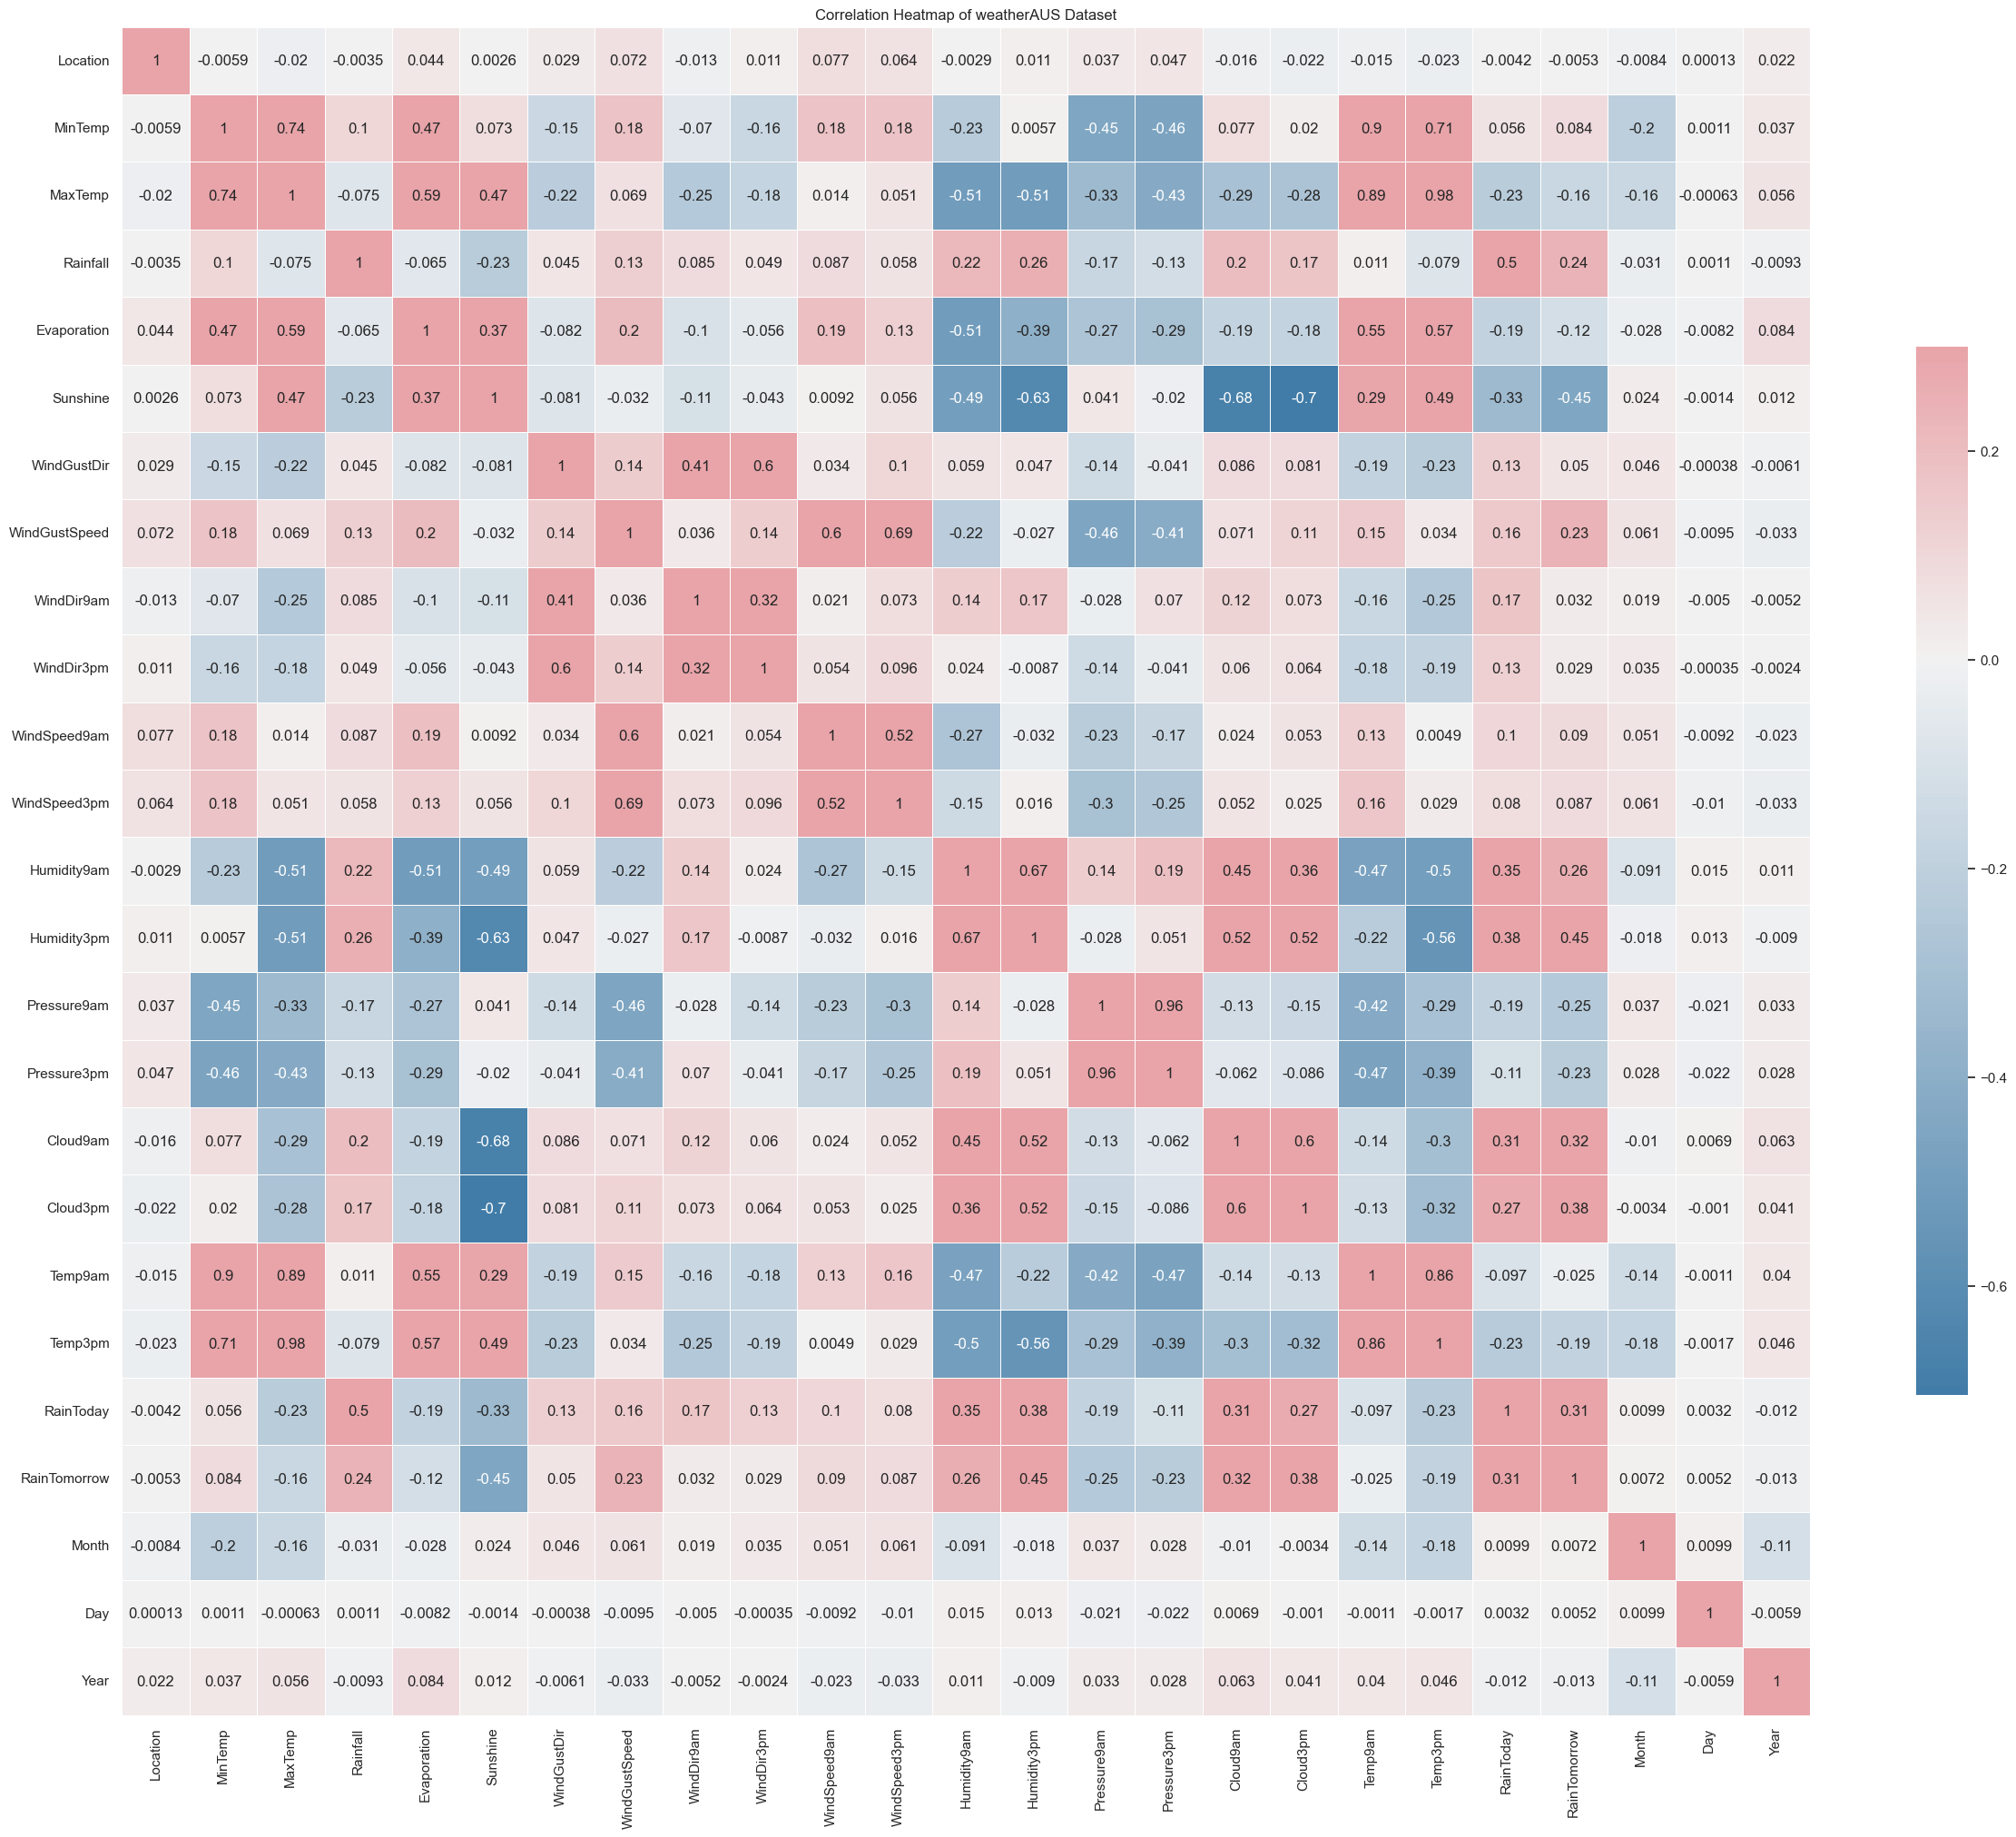

In [20]:
from sklearn.preprocessing import StandardScaler, OrdinalEncoder
scaler = StandardScaler()
encoder = OrdinalEncoder()

cat = ['Location', 'WindGustDir', 'WindDir9am',
       'WindDir3pm', 'RainToday', 'Month', 'Day', 'Year','RainTomorrow']

num = ['MinTemp', 'MaxTemp', 'Rainfall', 'Evaporation', 'Sunshine', 'WindGustSpeed', 'WindSpeed9am', 'WindSpeed3pm',
       'Humidity9am', 'Humidity3pm', 'Pressure9am', 'Pressure3pm', 'Cloud9am', 'Cloud3pm', 'Temp9am', 'Temp3pm']

# Chuẩn bị dữ liệu cho StandardScaler và OrdinalEncoder

df_for_analyst[cat] = encoder.fit_transform(df_for_analyst[cat])
df_for_analyst[num] = scaler.fit_transform(df_for_analyst[num])



corr_matrix = df_for_analyst.corr(numeric_only=True)

# Set up the matplotlib figure
plt.figure(figsize=(30, 30))

# Generate a custom diverging colormap
cmap = sns.diverging_palette(240, 10, n=9, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr_matrix, cmap=cmap, vmax=.3, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5}, annot=True)

# Add title
plt.title('Correlation Heatmap of weatherAUS Dataset')

# Show the plot
plt.show()

# Xử lý dữ liệu

## Data Cleaning

### Xóa các hàng có giá trị của kết quả là NaN và chuyển Yes/No thành 1/0

In [21]:
df.dropna(subset=['RainTomorrow'], inplace=True)

df['RainTomorrow']=pd.factorize(df['RainTomorrow'])[0]
y = df['RainTomorrow']

### Chọn ra các feature category và numeric

In [22]:
# df.info()
cat = ['Location', 'WindGustDir', 'WindDir9am',
       'WindDir3pm', 'RainToday', 'Month', 'Day', 'Year']

num = ['MinTemp', 'MaxTemp', 'Rainfall', 'Evaporation', 'Sunshine', 'WindGustSpeed', 'WindSpeed9am', 'WindSpeed3pm',
       'Humidity9am', 'Humidity3pm', 'Pressure9am', 'Pressure3pm', 'Cloud9am', 'Cloud3pm', 'Temp9am', 'Temp3pm']

### Kiểm tra tỉ lệ các giá trị NaN

In [23]:
NaN_percent = df.isna().sum()/df.shape[0]
# NaN_percent

### Thay các giá trị NaN của numeric thành giá trị median và category thành mode

In [24]:
for col in num:
    median = df[col].median()
    df[col].fillna(median, inplace=True)

for col in cat:
    mode_val = df[col].mode()[0]
    df[col].fillna(mode_val, inplace=True)

# df.head(10)

## Data normalize

StandardScaler các cột dữ liệu số
OrdinalEncoder các cột dữ liệu category

In [25]:
from sklearn.preprocessing import StandardScaler, OrdinalEncoder
scaler = StandardScaler()
encoder = OrdinalEncoder()

# Chuẩn bị dữ liệu cho StandardScaler và OrdinalEncoder

df[cat] = encoder.fit_transform(df[cat])
df[num] = scaler.fit_transform(df[num])

# df.head(5)

Tạo dữ liệu để train test


In [26]:
X = df[features]
y = df['RainTomorrow']

X_train, X_test, y_train, y_test = train_test_split(
    X, y, random_state=100, test_size=0.2, shuffle=False)

## Feature Selection

In [27]:
from sklearn.feature_selection import SelectKBest, f_regression

X = df[features]  # Xác định các đặc trưng

y = df['RainTomorrow']  # Xác định nhãn

# Áp dụng SelectKBest để chọn 2 đặc trưng tốt nhất
selector = SelectKBest(score_func = f_regression, k=int(len(features)*0.8))
X_new = selector.fit_transform(X, y)

# In kết quả
new_features = list(X.columns[selector.get_support()])
drop_features = [i for i in features if i not in new_features]
print("Selected Features:")
print(drop_features)

Selected Features:
['WindGustDir', 'WindDir9am', 'WindDir3pm', 'Temp9am']


# Trainning Model

## Ensemble Learing

In [28]:
from sklearn.ensemble import BaggingClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split

### Bagging

In [29]:
# Define the base classifier (e.g., Decision Tree)
base_classifier = DecisionTreeClassifier(random_state=42)

# Define the Bagging Classifier
bagging_classifier = BaggingClassifier(
    base_classifier, n_estimators=10, random_state=42)

# Fit the Bagging Classifier on the training data
bagging_classifier.fit(X_train, y_train)

# Make predictions on the test set
y_pred = bagging_classifier.predict(X_test)

# Evaluate the accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.2f}")

Accuracy: 0.85


### Boosting

Boostring không sử dụng hạn chế overfiting

In [30]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import AdaBoostClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score

# Define the base classifier (e.g., Decision Tree)
base_classifier = DecisionTreeClassifier(random_state=42)

# Define the AdaBoost Classifier
adaboost_classifier = AdaBoostClassifier(
    base_classifier, n_estimators=50, random_state=42)

# Fit the AdaBoost Classifier on the training data
adaboost_classifier.fit(X_train, y_train)

# Make predictions on the test set
y_pred = adaboost_classifier.predict(X_test)

# Evaluate the accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.2f}")


Accuracy: 0.79


Boosting áp dụng giới hạn độ sâu của cây (max_depth) để giảm overfitting tăng hiệu suất

In [31]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

# Define the base classifier (e.g., Decision Tree)
base_classifier = DecisionTreeClassifier(max_depth=5, random_state=42)

# Define the Bagging Classifier with pruning
bagging_classifier = BaggingClassifier(
    base_classifier, n_estimators=10, random_state=42)

# Fit the Bagging Classifier on the training data
bagging_classifier.fit(X_train, y_train)

# Make predictions on the test set
y_pred = bagging_classifier.predict(X_test)

# Evaluate the accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.2f}")

Accuracy: 0.86


### Stacking

In [32]:
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.ensemble import StackingClassifier

# Define base models
base_models = [
    ('rf', RandomForestClassifier(random_state=42)),
    ('gb', GradientBoostingClassifier(random_state=42)),
    ('knn', KNeighborsClassifier())
]

# Define the meta-model
meta_model = LogisticRegression(random_state=42)

# Create the stacking classifier
stacking_classifier = StackingClassifier(
    estimators=base_models, final_estimator=meta_model)

# Fit the stacking classifier on the training data
stacking_classifier.fit(X_train, y_train)

# Make predictions on the test set
y_pred = stacking_classifier.predict(X_test)

# Evaluate the accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.2f}")


Accuracy: 0.86


### Feed Forward Neural Network

In [33]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

# Assuming 'x' contains your features and 'y' is your target variable

# Create a Feedforward Neural Network model
model = Sequential()

# Add input layer and the first hidden layer
model.add(Dense(units=64, activation='relu', input_dim=X_train.shape[1]))

# Add a second hidden layer
model.add(Dense(units=32, activation='relu'))

# Add the output layer (for binary classification, use 'sigmoid' activation)
model.add(Dense(units=1, activation='sigmoid'))

# Compile the model
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Train the model on the training data
model.fit(X_train, y_train, epochs=10, batch_size=32, validation_split=0.2)

# Evaluate the model on the test set
y_pred_probs = model.predict(X_test)
y_pred = (y_pred_probs > 0.5).astype(int)  # Convert probabilities to binary predictions

accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.2f}")

Epoch 1/10
2844/2844 [==============================] - 3s 997us/step - loss: 0.3867 - accuracy: 0.8297 - val_loss: 0.3468 - val_accuracy: 0.8451
Epoch 2/10
2844/2844 [==============================] - 3s 961us/step - loss: 0.3699 - accuracy: 0.8392 - val_loss: 0.3495 - val_accuracy: 0.8444
Epoch 3/10
2844/2844 [==============================] - 3s 1ms/step - loss: 0.3651 - accuracy: 0.8409 - val_loss: 0.3457 - val_accuracy: 0.8460
Epoch 4/10
2844/2844 [==============================] - 3s 960us/step - loss: 0.3623 - accuracy: 0.8411 - val_loss: 0.3394 - val_accuracy: 0.8502
Epoch 5/10
2844/2844 [==============================] - 3s 974us/step - loss: 0.3598 - accuracy: 0.8433 - val_loss: 0.3399 - val_accuracy: 0.8488
Epoch 6/10
2844/2844 [==============================] - 3s 987us/step - loss: 0.3576 - accuracy: 0.8446 - val_loss: 0.3405 - val_accuracy: 0.8481
Epoch 7/10
2844/2844 [==============================] - 3s 1ms/step - loss: 0.3561 - accuracy: 0.8452 - val_loss: 0.3445 - val

### Reccurent Neural Network

Epoch 1/15
3554/3554 [==============================] - 30s 8ms/step - loss: 0.1713 - accuracy: 0.7661 - val_loss: 0.1396 - val_accuracy: 0.8006
Epoch 2/15
3554/3554 [==============================] - 28s 8ms/step - loss: 0.1597 - accuracy: 0.7769 - val_loss: 0.1379 - val_accuracy: 0.8056
Epoch 3/15
3554/3554 [==============================] - 28s 8ms/step - loss: 0.1578 - accuracy: 0.7779 - val_loss: 0.1368 - val_accuracy: 0.8067
Epoch 4/15
3554/3554 [==============================] - 28s 8ms/step - loss: 0.1567 - accuracy: 0.7796 - val_loss: 0.1382 - val_accuracy: 0.8044
Epoch 5/15
3554/3554 [==============================] - 28s 8ms/step - loss: 0.1556 - accuracy: 0.7811 - val_loss: 0.1354 - val_accuracy: 0.8064
Epoch 6/15
3554/3554 [==============================] - 28s 8ms/step - loss: 0.1552 - accuracy: 0.7814 - val_loss: 0.1366 - val_accuracy: 0.8080
Epoch 7/15
3554/3554 [==============================] - 29s 8ms/step - loss: 0.1545 - accuracy: 0.7825 - val_loss: 0.1373 - val_ac

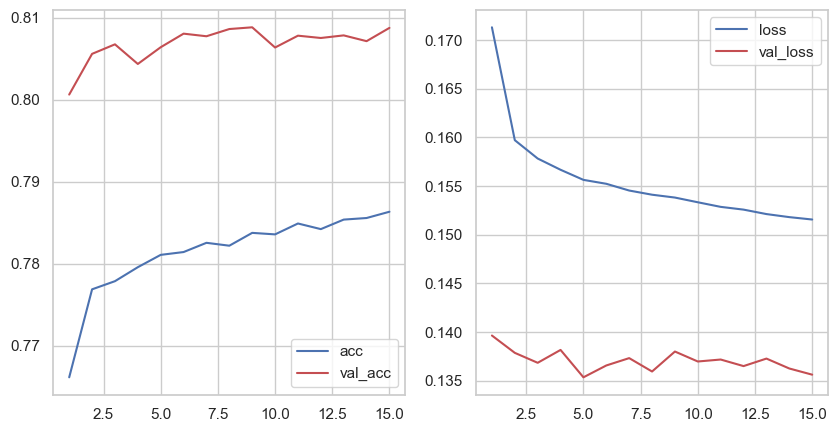

0.808821439743042

In [34]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from keras import models
from keras import layers
from keras.optimizers import Adam
import numpy as np
k = 30 # for best result, you may increase k value


r_xtrain = [X_train.iloc[i:i+k] for i in range(X_train.shape[0]-k-1)]
r_ytrain = [y_train.iloc[i+k] for i in range(y_train.shape[0]-k-1)]

r_xtest = [X_test.iloc[i:i+k] for i in range(X_test.shape[0]-k-1)]
r_ytest = [y_test.iloc[i+k] for i in range(y_test.shape[0]-k-1)]

r_xtrain = np.array(r_xtrain)
r_ytrain = np.array(r_ytrain)

r_xtest = np.array(r_xtest)
r_ytest = np.array(r_ytest)

model = models.Sequential()

model.add(layers.GRU(32, input_shape=(None, r_xtrain.shape[-1]), recurrent_dropout=0.2))
model.add(layers.Dense(1))
model.compile(optimizer=Adam(amsgrad=True), loss='mse', metrics='accuracy')
history = model.fit(x=r_xtrain,
                    y=r_ytrain,
                    epochs=15,
                    validation_data=(r_xtest, r_ytest)
                        )
def history_plt(history):
    loss = history.history['loss']
    acc = history.history['accuracy']
    val_loss = history.history['val_loss']
    val_acc = history.history['val_accuracy']

    epochs = range(1, len(loss) + 1)

    fig, ax = plt.subplots(1, 2, figsize=(10, 5))
    ax[0].plot(epochs, acc, label='acc', color='b')
    ax[0].plot(epochs, val_acc, label='val_acc', color='r')
    ax[0].legend()
    ax[1].plot(epochs, loss, label='loss', color='b')
    ax[1].plot(epochs, val_loss, label='val_loss', color='r')
    ax[1].legend()
    plt.show()
history_plt(history)
np.max(history.history['val_accuracy'])

#### Dùng Cross Validation để hạn chế Overfiting

In [35]:
from sklearn.model_selection import cross_val_score
scores = cross_val_score(bagging_classifier, X_train, y_train, cv=5)  # 5-fold cross-validation
print(f"Cross-Validation Accuracy: {scores.mean():.2f} (+/- {scores.std() * 2:.2f})")

Cross-Validation Accuracy: 0.83 (+/- 0.01)


In [36]:
# Chạy mất nhiều thời gian quá bọn em chạy không kịp.
scores = cross_val_score(adaboost_classifier, X_train, y_train, cv=5)  # 5-fold cross-validation
print(f"Cross-Validation Accuracy: {scores.mean():.2f} (+/- {scores.std() * 2:.2f})")

scores = cross_val_score(stacking_classifier, X_train, y_train, cv=5)  # 5-fold cross-validation
print(f"Cross-Validation Accuracy: {scores.mean():.2f} (+/- {scores.std() * 2:.2f})")

Cross-Validation Accuracy: 0.77 (+/- 0.03)
Cross-Validation Accuracy: 0.84 (+/- 0.02)


## Các biện pháp dùng để tối ưu, cải thiện độ chính xác mô hình học máy

1. Đánh Giá Mô Hình Hiện Tại
Sử dụng tập dữ liệu kiểm tra: Đánh giá mô hình trên một tập dữ liệu không tham gia vào quá trình huấn luyện.
Ma trận nhầm lẫn (Confusion Matrix): Phân tích những trường hợp mô hình dự đoán đúng và sai.
2. Phân Tích Lỗi
Xác định mẫu lỗi: Phân tích các trường hợp mà mô hình dự đoán sai để tìm ra xu hướng hoặc mẫu lỗi chung.
Kiểm tra dữ liệu: Đôi khi lỗi xuất phát từ dữ liệu không chính xác hoặc không đầy đủ.
3. Cải Thiện Dữ Liệu
Dữ liệu bổ sung: Nếu có vấn đề với tập dữ liệu (ví dụ: không đủ đa dạng), hãy cân nhắc thu thập thêm dữ liệu.
Feature Engineering: Tạo hoặc biến đổi các đặc trưng để cung cấp thông tin hữu ích hơn cho mô hình.
4. Tinh Chỉnh Mô Hình
Hyperparameter Tuning: Sử dụng các phương pháp như Grid Search hoặc Random Search để tìm ra bộ hyperparameters tốt nhất.
Thử nghiệm với kiến trúc mô hình khác: Đôi khi thay đổi kiến trúc mô hình có thể mang lại kết quả tốt hơn.
5. Sử Dụng Kỹ Thuật Advanced
Ensemble Learning: Kết hợp nhiều mô hình khác nhau có thể giúp cải thiện độ chính xác.
Transfer Learning (nếu phù hợp): Sử dụng mô hình đã được huấn luyện trước trên một tập dữ liệu lớn và tinh chỉnh nó cho bài toán cụ thể của bạn.
6. Kiểm Tra và Lặp Lại
Cross-Validation: Đánh giá mô hình sau mỗi thay đổi để đảm bảo rằng cải tiến thực sự hiệu quả.
Lặp lại quy trình: Nếu cần, lặp lại các bước trên để tiếp tục cải thiện mô hình.
7. Đánh Giá Lại
So sánh với baseline: Đối chiếu kết quả sau cải tiến với kết quả ban đầu để xác định liệu đã có cải thiện đáng kể hay không.
Phân tích ảnh hưởng của các thay đổi: Xác định những thay đổi nào mang lại hiệu suất tốt nhất.
Quá trình này yêu cầu phân tích kỹ lưỡng và thường xuyên điều chỉnh dựa trên phản hồi từ dữ liệu và kết quả mô hình. Việc cải thiện mô hình là một quá trình lặp đi lặp lại, không phải lúc nào cũng có kết quả ngay lập tức.

#### Dùng GridSearch để tối ưu hóa tham số và kết hợp với Early Stoping và Cross Validation

### Sử dụng Feature Selection

In [37]:
from sklearn.model_selection import GridSearchCV

# Định nghĩa các hyperparameters cần tìm kiếm
param_grid = {
    'n_estimators': [50, 100, 150],
    'learning_rate': [0.01, 0.1, 1.0]
}

# Tạo AdaBoost classifier
base_classifier = DecisionTreeClassifier(random_state=42, max_depth=5, min_samples_split=5)
adaboost_classifier = AdaBoostClassifier(base_classifier, random_state=42)

# Sử dụng GridSearchCV để tìm kiếm hyperparameters tốt nhất
grid_search = GridSearchCV(adaboost_classifier, param_grid, cv=5, scoring='accuracy')
grid_search.fit(X_train, y_train)

# In ra hyperparameters tốt nhất
print("Best Hyperparameters:", grid_search.best_params_)

# Huấn luyện lại mô hình với hyperparameters tốt nhất
best_adaboost_classifier = grid_search.best_estimator_
best_adaboost_classifier.fit(X_train, y_train)

# Đánh giá mô hình trên tập kiểm tra
y_pred = best_adaboost_classifier.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print(f"Test Set Accuracy after Improvement: {accuracy:.2f}")


Best Hyperparameters: {'learning_rate': 0.1, 'n_estimators': 100}
Test Set Accuracy after Improvement: 0.86


In [38]:
df_R5 = df.copy()

In [39]:
feature = df[features]
target = df['RainTomorrow']

In [40]:
from sklearn.feature_selection import RFE
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC

scaler = StandardScaler()
scaled_feature = scaler.fit_transform(feature)

rf_model = RandomForestClassifier(random_state=42, n_estimators=100, min_samples_split=10)
rf_model.fit(feature, target)


feature_importances = pd.Series(rf_model.feature_importances_, index = feature.columns)

rfe = RFE(estimator = rf_model, n_features_to_select=20, step=1)
rfe.fit(feature, target)

list_feature = feature.columns.tolist()
resultsRFE = pd.DataFrame({'Feature': feature.columns, 'Ranking': rfe.ranking_})

results = resultsRFE.sort_values('Ranking', ascending=True)
print(results)

          Feature  Ranking
0         MinTemp        1
16       Cloud3pm        1
15       Cloud9am        1
14    Pressure3pm        1
13    Pressure9am        1
12    Humidity3pm        1
11    Humidity9am        1
10   WindSpeed3pm        1
17        Temp9am        1
9    WindSpeed9am        1
7      WindDir9am        1
6   WindGustSpeed        1
5     WindGustDir        1
4        Sunshine        1
3     Evaporation        1
2        Rainfall        1
1         MaxTemp        1
8      WindDir3pm        1
18        Temp3pm        1


In [41]:
rfe = RFE(rf_model, n_features_to_select = 15)

X = df[features]
y = df['RainTomorrow']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)

X_train = scaler.fit_transform(X_train)
X_test = scaler.fit_transform(X_test)

X_train_new = rfe.fit_transform(X_train, y_train)
X_test_new = rfe.transform(X_test)

In [42]:
def loss_accuracy_of_feature_selection(model):
    model.fit(X_train_new, y_train)
    y_pred = model.predict(X_test_new)

    accuracy = accuracy_score(y_test, y_pred) * 100

    return accuracy

In [43]:
loss_accuracy_of_feature_selection(bagging_classifier)

83.70899117409192

In [44]:
voting_adaboost = VotingClassifier(estimators=[
    ('Bagging', bagging_classifier),
    (' AdaBosst', adaboost_classifier),
    (' Stacking', stacking_classifier)
], voting='hard')
voting_adaboost

VotingClassifier(estimators=[('Bagging',
                              BaggingClassifier(estimator=DecisionTreeClassifier(max_depth=5,
                                                                                 random_state=42),
                                                random_state=42)),
                             (' AdaBosst',
                              AdaBoostClassifier(estimator=DecisionTreeClassifier(max_depth=5,
                                                                                  min_samples_split=5,
                                                                                  random_state=42),
                                                 random_state=42)),
                             (' Stacking',
                              StackingClassifier(estimators=[('rf',
                                                              RandomForestClassifier(random_state=42)),
                                                             ('gb',
                                                              GradientBoostingClassifier(random_state=42)),
                                                             ('knn',
                                                              KNeighborsClassifier())],
                                                 final_estimator=LogisticRegression(random_state=42)))])

In [45]:
X = df[features]
y = df['RainTomorrow']

X_train, X_test, y_train, y_test = train_test_split(
    X, y, random_state=100, test_size=0.2, shuffle=False)

In [46]:
voting_adaboost.fit(X_train, y_train)

VotingClassifier(estimators=[('Bagging',
                              BaggingClassifier(estimator=DecisionTreeClassifier(max_depth=5,
                                                                                 random_state=42),
                                                random_state=42)),
                             (' AdaBosst',
                              AdaBoostClassifier(estimator=DecisionTreeClassifier(max_depth=5,
                                                                                  min_samples_split=5,
                                                                                  random_state=42),
                                                 random_state=42)),
                             (' Stacking',
                              StackingClassifier(estimators=[('rf',
                                                              RandomForestClassifier(random_state=42)),
                                                             ('gb',
                                                              GradientBoostingClassifier(random_state=42)),
                                                             ('knn',
                                                              KNeighborsClassifier())],
                                                 final_estimator=LogisticRegression(random_state=42)))])

In [47]:
# Make predictions on the test set
y_pred = voting_adaboost.predict(X_test)

# Evaluate the accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.2f}")

Accuracy: 0.86
